In [266]:
import pandas as pd
import datetime

In [267]:
df = pd.read_csv("./database/GuildStashHistory.csv")

In [268]:
df = df.drop(["League"], axis=1)
df

,Date,Account,Action,Stash,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,$,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,$,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,$,221× Orb of Scouring
...,...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,$,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,$,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,$,Orb of Transmutation


In [269]:
Dates = pd.to_datetime(df["Date"], format='%d/%m/%Y %H:%M:%S')
Dates

0       2023-12-22 16:29:00
1       2023-12-22 16:28:59
2       2023-12-22 16:28:57
3       2023-12-22 16:28:57
4       2023-12-22 16:28:41
                ...        
27657   2023-12-08 20:33:19
27658   2023-12-08 20:33:19
27659   2023-12-08 20:33:19
27660   2023-12-08 20:16:43
27661   2023-12-08 20:16:41
Name: Date, Length: 27662, dtype: datetime64[ns]

In [270]:
df.replace("Date", Dates)

,Date,Account,Action,Stash,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,$,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,$,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,$,221× Orb of Scouring
...,...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,$,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,$,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,$,Orb of Transmutation


In [271]:
df = df[df["Stash"] == "$"].drop(["Stash"], axis=1)
df

,Date,Account,Action,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation


In [279]:
df = df.reindex(index=df.index[::-1])
df

,Date,Account,Action,Item
27661,08/12/2023 20:16:41,ErZil,added,9× Transmutation Shard
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring


In [280]:
def strItemRead(itemStr):
    if itemStr[0].isdigit():
        ndigits = 0
        for i in itemStr:
            if i.isdigit():
                ndigits += 1
        nbItem = int(itemStr[0:ndigits])
        item = itemStr[ndigits+2:]
    else:
        item = itemStr
        nbItem = 1
    return nbItem, item

print(strItemRead("1x Divine Orb"))
print(strItemRead("level 1 0% Fireball"))

(1, 'Divine Orb')
(1, 'level 1 0% Fireball')


In [286]:
Stash = []
Diff = []

for index, row in df.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

<AxesSubplot: >

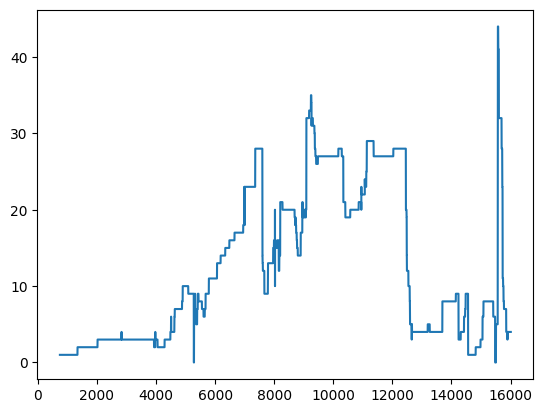

In [290]:
df_Stash["Divine Orb"].plot()